# New Popularity

In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import metrics
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("../OnlineNewsPopularity.csv")
data = data.rename(columns=lambda x: x.strip())
data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [3]:
data[data.isnull()]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [5]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [8]:
# data[" n_non_stop_words"]

In [9]:
data.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936


In [10]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,0.130465,0.046884,0.054492,-0.049109,0.055788,0.076287,0.083277,-0.170250,0.591199,0.029503,0.133225,-0.076590,-0.637824,-0.493093,-0.157204,-0.051820,-0.163164,-0.011438,-0.014501,-0.015655,-0.006129,-0.005781,0.009961,0.004042,-0.002853,-0.004067,0.004226,0.000272,0.080894,0.004423,-0.141713,-0.030838,0.092906,0.133837,0.158646,0.207604,0.010266,0.198654,-0.071968,0.126344,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,-0.006077,-0.070815,0.132791,-0.023902,-0.090394,-0.046716,0.049223,-0.110672,-0.005890,-0.031400,0.012926,0.120841,0.115746,-0.002370,0.006918,0.004296,-0.004563,0.000128,0.000661,0.004274,0.009322,0.008935,-0.015472,-0.002015,-0.015013,0.006289,-0.005996,-0.070038,0.063568,0.038365,0.042208,-0.065063,-0.056804,-0.072226,-0.064951,0.015530,-0.066589,0.034186,-0.049619,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,0.072845,0.037548,0.060200,-0.006105,0.033424,0.025408,0.055989,-0.054345,0.000066,-0.003545,-0.022786,0.058860,-0.096460,-0.022286,-0.030496,-0.079624,-0.030686,0.025657,-0.013809,-0.002484,-0.004027,-0.016891,-0.007395,-0.015949,0.034538,0.036394,0.052024,0.026218,-0.009724,0.087266,-0.140141,0.041265,0.127879,0.021937,0.133979,0.125013,0.098960,0.101053,0.135123,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,-0.003679,-0.001653,0.011016,-0.000264,-0.000945,-0.002328,-0.005535,0.001601,-0.000552,-0.000826,0.000577,-0.001624,0.000805,0.004563,-0.002120,-0.002083,0.001036,-0.000222,0.001992,-0.002142,0.010538,-0.002224,-0.002248,-0.001398,-0.002563,-0.001803,-0.003186,-0.002213,-0.000827,-0.006855,-0.003689,-0.004260,-0.000180,0.000523,0.000014,-0.000877,-0.000667,-0.001657,-0.000487,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,-0.001439,-0.000314,0.010903,-0.000012,-0.000078,0.000061,-0.002702,-0.000352,-0.000595,-0.000892,-0.000553,0.000394,-0.002939,0.003284,-0.003408,-0.005415,0.000339,0.000170,0.001614,-0.002147,0.010501,-0.002517,-0.002360,-0.001963,-0.001508,-0.001338,-0.002082,-0.001031,-0.002869,-0.003286,-0.009761,-0.001072,0.002565,0.000831,0.001535,0.001036,0.002421,0.001245,0.002285,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_uniqu

In [11]:
corr.shares.describe()

count    60.000000
mean      0.026610
std       0.131024
min      -0.059163
25%      -0.004209
50%       0.005426
75%       0.024736
max       1.000000
Name: shares, dtype: float64

In [12]:
corr[corr.shares>0.02].index

Index(['num_hrefs', 'num_imgs', 'num_videos', 'num_keywords', 'kw_max_min',
       'kw_avg_min', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_03', 'global_subjectivity',
       'title_subjectivity', 'abs_title_sentiment_polarity', 'shares'],
      dtype='object')

- 

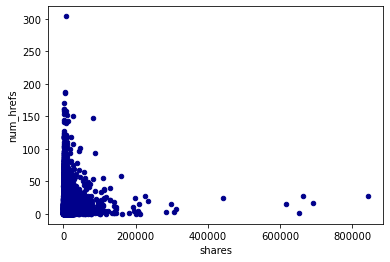

In [13]:
ax1 = data.plot.scatter(y='num_hrefs', x='shares', c='DarkBlue')

In [14]:
for i in list(corr[corr.shares>0.02].index):
    print(i)
    

num_hrefs
num_imgs
num_videos
num_keywords
kw_max_min
kw_avg_min
kw_avg_max
kw_min_avg
kw_max_avg
kw_avg_avg
self_reference_min_shares
self_reference_max_shares
self_reference_avg_sharess
LDA_03
global_subjectivity
title_subjectivity
abs_title_sentiment_polarity
shares


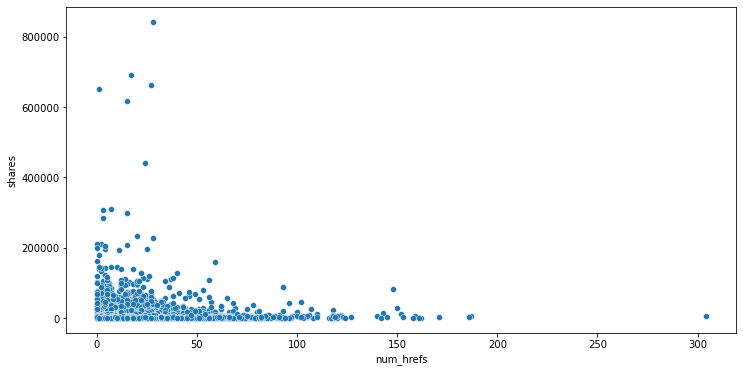

In [15]:
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=data, x="num_hrefs", y="shares")
plt.title("")
plt.show()

num_hrefs


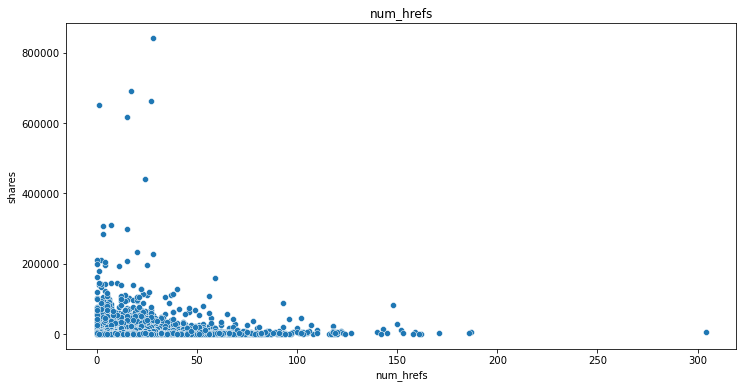

num_imgs


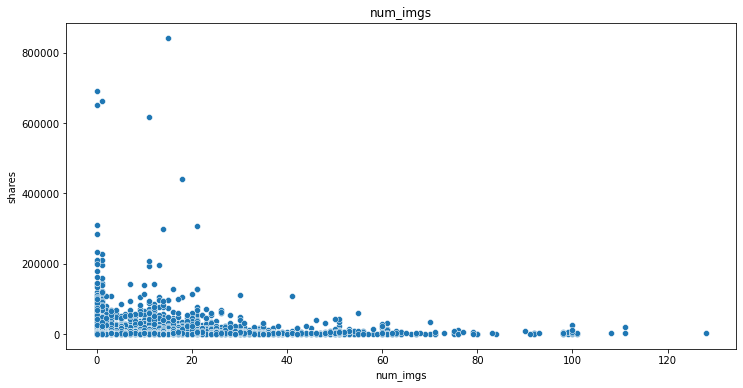

num_videos


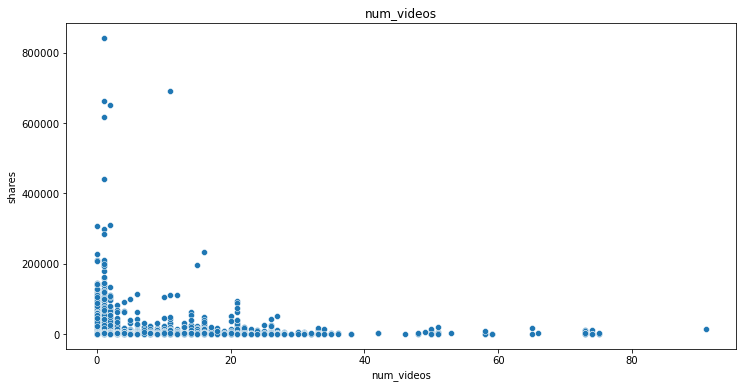

num_keywords


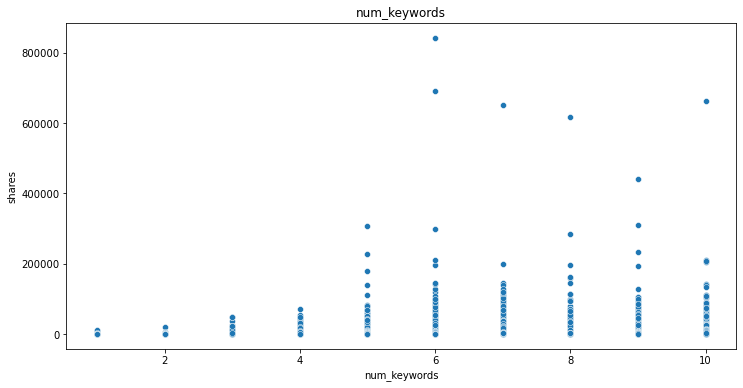

kw_max_min


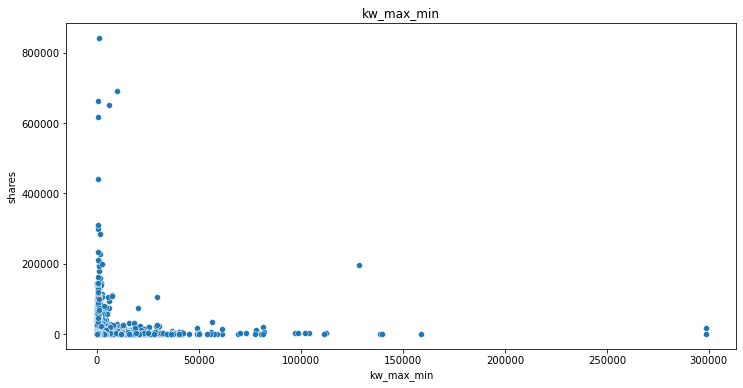

kw_avg_min


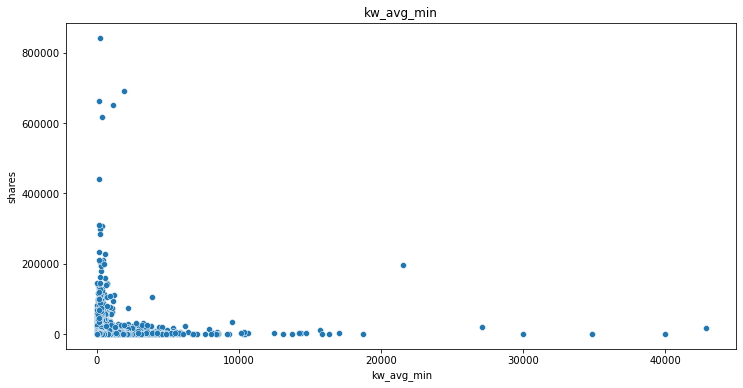

kw_avg_max


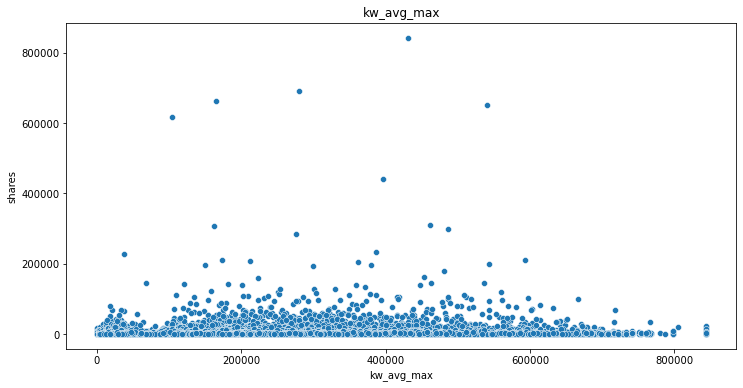

kw_min_avg


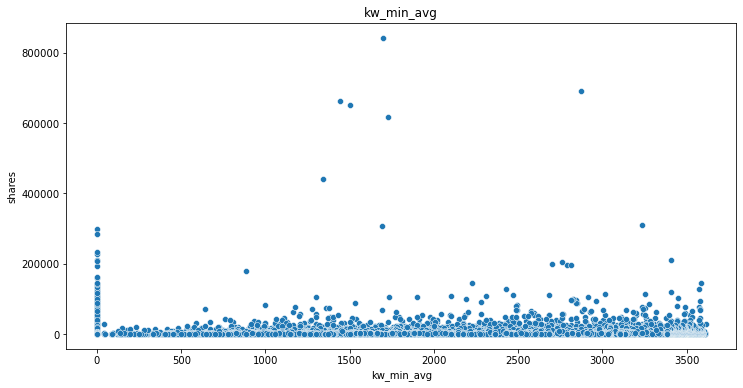

kw_max_avg


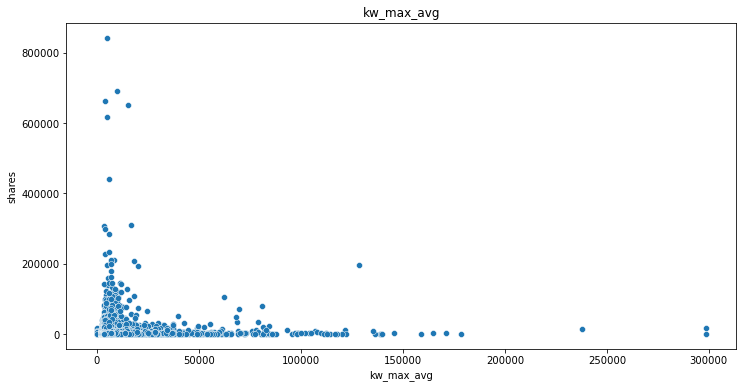

kw_avg_avg


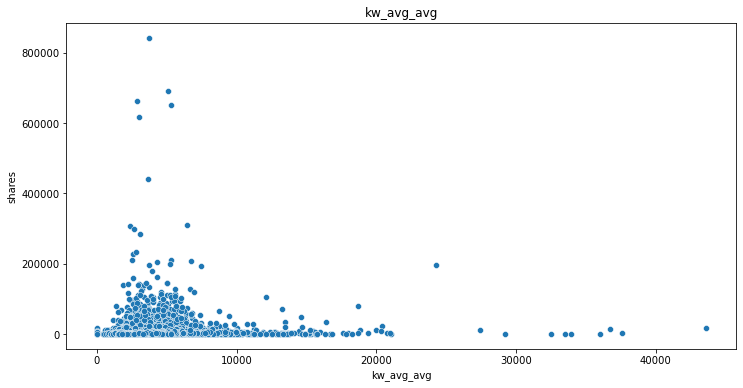

self_reference_min_shares


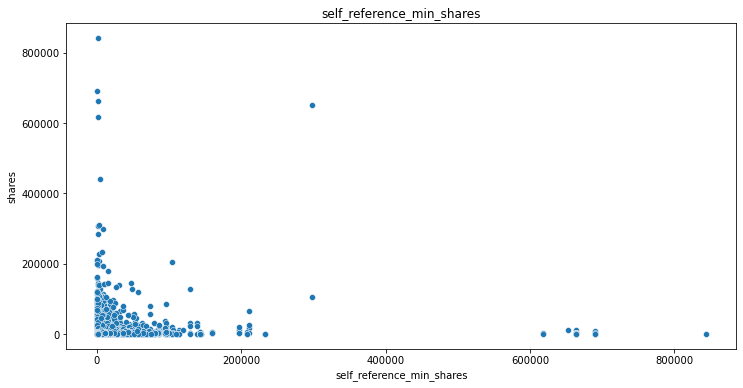

self_reference_max_shares


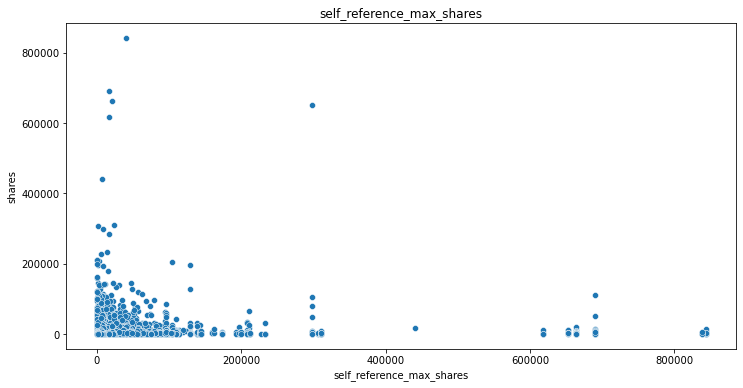

self_reference_avg_sharess


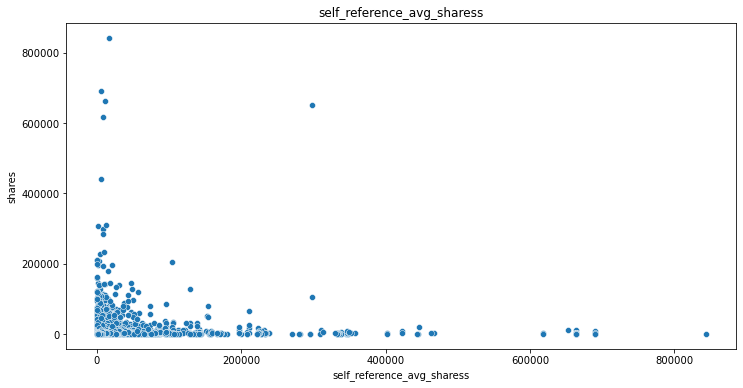

LDA_03


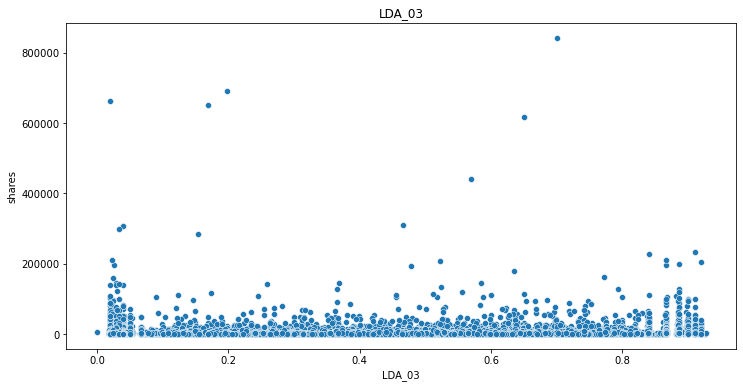

global_subjectivity


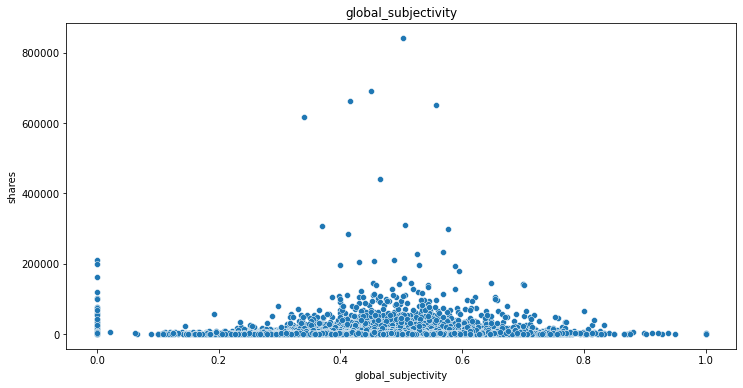

title_subjectivity


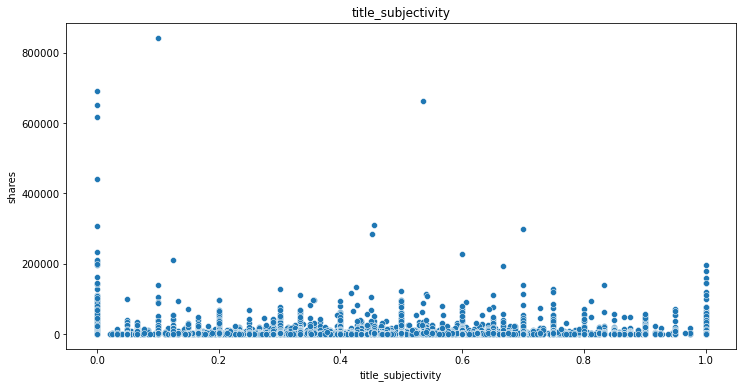

abs_title_sentiment_polarity


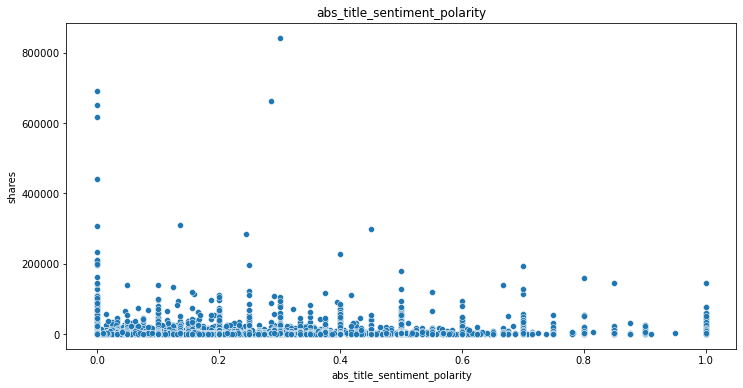

shares


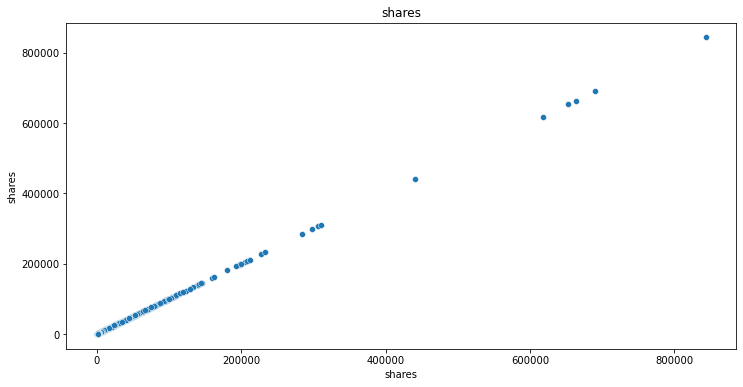

In [16]:
for i in list(corr[corr.shares>0.02].index):
    print(i)
    plt.figure(figsize=(12, 6))
    ax = sns.scatterplot(data=data, x=i, y="shares")
    plt.title(i)
    plt.show()

# Negative correlation columns

In [17]:
temp_data = data[data['shares'] <= 100000]

dff = data[["shares", "rate_positive_words", "rate_negative_words", "global_rate_positive_words", "global_rate_negative_words"]].corr()
dff

,shares,rate_positive_words,rate_negative_words,global_rate_positive_words,global_rate_negative_words
shares,1.000000,-0.013241,-0.005183,0.000543,0.006615
rate_positive_words,-0.013241,1.000000,-0.530962,0.628626,-0.398689
rate_negative_words,-0.005183,-0.530962,1.000000,-0.330125,0.779556
global_rate_positive_words,0.000543,0.628626,-0.330125,1.000000,0.106538
global_rate_negative_words,0.006615,-0.398689,0.779556,0.106538,1.000000


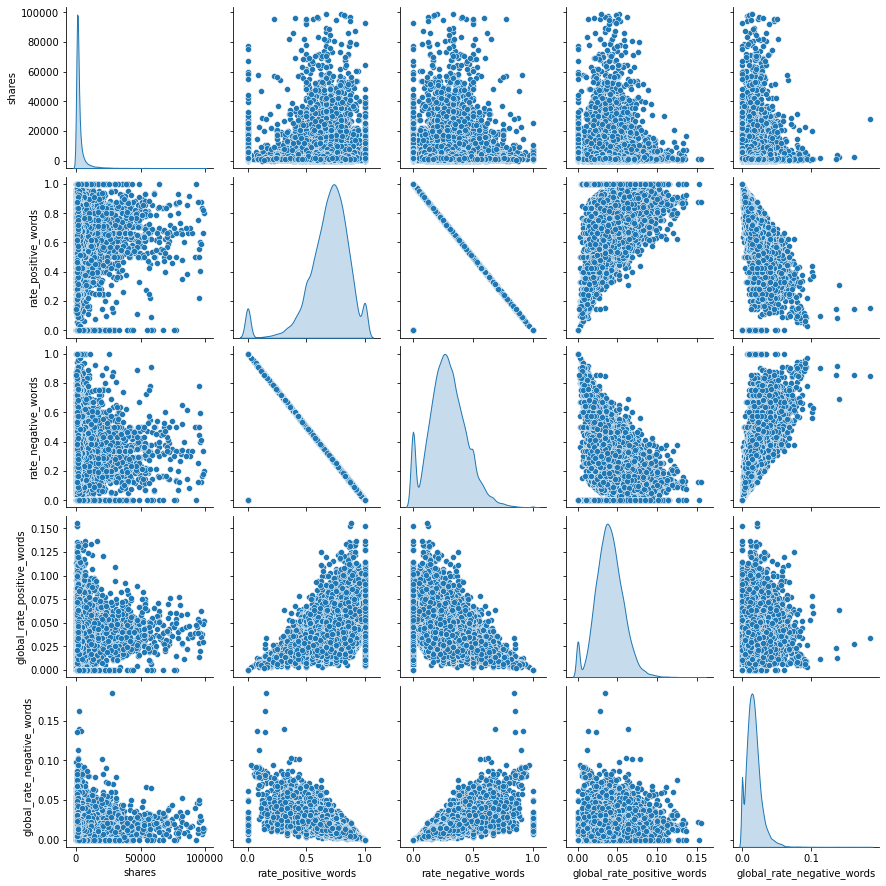

In [18]:
sns.pairplot(temp_data[["shares", "rate_positive_words", "rate_negative_words", "global_rate_positive_words", "global_rate_negative_words"]], diag_kind='kde')

## Modeling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
X = data[["rate_positive_words", "rate_negative_words", "global_rate_positive_words", "global_rate_negative_words"]]
y = data["shares"]

In [21]:
# spliting train, test data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
reg = LinearRegression().fit(X, y)

In [24]:
reg.score(X, y)

0.0006950546366030208

In [25]:
reg.predict(np.array([[3, 5, 7, 9]]))

array([270853.18991795])

In [26]:
y_pred = reg.predict(X_test)
len(y_pred)

13083

In [27]:
y_test

32340     2900
10480     1300
15370    17700
31592     1500
198       1400
         ...  
19771      759
31012     1200
6020      2000
27091     9400
21794     2700
Name: shares, Length: 13083, dtype: int64

In [28]:
mean_squared_error(y_test, y_pred)

165160158.51544145

In [29]:
from sklearn.metrics import r2_score


In [30]:
r2_score(y_test, y_pred)

0.0006216509886366461

In [31]:
data[["rate_positive_words", "rate_negative_words", "global_rate_positive_words", "global_rate_negative_words", "shares"]]

,rate_positive_words,rate_negative_words,global_rate_positive_words,global_rate_negative_words,shares
0,0.769231,0.230769,0.045662,0.013699,593
1,0.733333,0.266667,0.043137,0.015686,711
2,0.857143,0.142857,0.056872,0.009479,1500
3,0.666667,0.333333,0.041431,0.020716,1200
4,0.860215,0.139785,0.074627,0.012127,505
...,...,...,...,...,...
39639,0.722222,0.277778,0.037572,0.014451,1800
39640,0.812500,0.187500,0.039634,0.009146,1900
39641,0.576923,0.423077,0.033937,0.024887,1900
39642,0.466667,0.533333,0.020528,0.023460,1100


In [32]:
reg_pred = reg.predict([[0.769231, 0.230769, 0.045662, 0.013699]])


In [33]:
reg_pred

array([3350.68366731])

## Second Modeling

In [34]:
# pip install sklearn.cross_validation

In [35]:
X1 = data.iloc[:,2:60]
y1 = data["shares"]

In [36]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X1_train,y1_train)

LinearRegression()

In [38]:
y1_pred=regressor.predict(X1_test)

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse=round((mean_squared_error(y1_test,y1_pred))/100, 2)
rmse = round((sqrt(mse))/100 ,2)
mse ,rmse

(1210954.17, 11.0)

In [40]:
import statsmodels.api as sm
X1=sm.add_constant(X1)
model=sm.OLS(y1,X1).fit()
model.summary()

C:\Users\ruthv\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     16.71
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          8.49e-158
Time:                        18:39:09   Log-Likelihood:            -4.2690e+05
No. Observations:               39644   AIC:                         8.539e+05
Df Residuals:                   39587   BIC:                         8.544e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.498e+05   5.21e+06     -0.029      0.977   -1.04e+07    1.01e+07
n_tokens_title                   89.8590     28.671      3.134      0.002      33.662     146.056
n_tokens_content                  0.5936      0.224      2.656      0.008       0.156       1.032
n_unique_tokens                3985.3268   1918.563      2.077      0.038     224.898    7745.756
n_non_stop_words              -1483.7131   5910.913     -0.251      0.802   -1.31e+04    1.01e+04
n_non_stop_unique_tokens      -1640.5066   1629.463     -1.007      0.314   -4834.293    1553.280
num_hrefs                        26.5413      6.706      3.958      0.000      13.397      39.686
num_self_hrefs                  -57.6437     17.818     -3.235      0.001     -92.567     -22.720
num_imgs                         11.8973      8.942      1.331      0.183      -5.629      29.424
num_videos                        5.6446     15.751      0.358      0.720     -25.227      36.516
average_token_length           -586.7276    242.856     -2.416      0.016   -1062.731    -110.724
num_keywords                     49.4938     37.137      1.333      0.183     -23.295     122.282
data_channel_is_lifestyle     -1050.0274    394.651     -2.661      0.008   -1823.553    -276.502
data_channel_is_entertainment -1180.4984    255.195     -4.626      0.000   -1680.687    -680.310
data_channel_is_bus            -802.3199    382.716     -2.096      0.036   -1552.452     -52.188
data_channel_is_socmed         -602.9408    372.377     -1.619      0.105   -1332.809     126.927
data_channel_is_tech           -550.9451    371.426     -1.483      0.138   -1278.948     177.058
data_channel_is_world          -483.0776    376.363     -1.284      0.199   -1220.758     254.603
kw_min_min                        2.2088      1.623      1.361      0.174      -0.973       5.391
kw_max_min                        0.0872      0.050      1.739      0.082      -0.011       0.185
kw_avg_min                       -0.3468      0.308     -1.127      0.260      -0.950       0.257
kw_min_max                       -0.0021      0.001     -1.761      0.078      -0.004       0.000
kw_max_max                       -0.0005      0.001     -0.890      0.373      -0.002       0.001
kw_avg_max                       -0.0007      0.001     -0.867      0.386      -0.002       0.001
kw_min_avg                       -0.3659      0.076     -4.836      0.000      -0.514      -0.218
kw_max_avg                       -0.2026      0.025     -8.010      0.000      -0.252      -0.153
kw_avg_avg                        1.6625      0.144     11.558      0.000       1.381       1.944
self_reference_min_shares         0.0262      0.008      3.476      0.001       0.011       0.041
self_reference_max_shares         0.0058     

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     16.71
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          8.49e-158
Time:                        18:39:09   Log-Likelihood:            -4.2690e+05
No. Observations:               39644   AIC:                         8.539e+05
Df Residuals:                   39587   BIC:                         8.544e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.498e+05   5.21e+06     -0.029      0.977   -1.04e+07    1.01e+07
n_tokens_title                   89.8590     28.671      3.134      0.002      33.662     146.056
n_tokens_content                  0.5936      0.224      2.656      0.008       0.156       1.032
n_unique_tokens                3985.3268   1918.563      2.077      0.038     224.898    7745.756
n_non_stop_words              -1483.7131   5910.913     -0.251      0.802   -1.31e+04    1.01e+04
n_non_stop_unique_tokens      -1640.5066   1629.463     -1.007      0.314   -4834.293    1553.280
num_hrefs                        26.5413      6.706      3.958      0.000      13.397      39.686
num_self_hrefs                  -57.6437     17.818     -3.235      0.001     -92.567     -22.720
num_imgs                         11.8973      8.942      1.331      0.183      -5.629      29.424
num_videos                        5.6446     15.751      0.358      0.720     -25.227      36.516
average_token_length           -586.7276    242.856     -2.416      0.016   -1062.731    -110.724
num_keywords                     49.4938     37.137      1.333      0.183     -23.295     122.282
data_channel_is_lifestyle     -1050.0274    394.651     -2.661      0.008   -1823.553    -276.502
data_channel_is_entertainment -1180.4984    255.195     -4.626      0.000   -1680.687    -680.310
data_channel_is_bus            -802.3199    382.716     -2.096      0.036   -1552.452     -52.188
data_channel_is_socmed         -602.9408    372.377     -1.619      0.105   -1332.809     126.927
data_channel_is_tech           -550.9451    371.426     -1.483      0.138   -1278.948     177.058
data_channel_is_world          -483.0776    376.363     -1.284      0.199   -1220.758     254.603
kw_min_min                        2.2088      1.623      1.361      0.174      -0.973       5.391
kw_max_min                        0.0872      0.050      1.739      0.082      -0.011       0.185
kw_avg_min                       -0.3468      0.308     -1.127      0.260      -0.950       0.257
kw_min_max                       -0.0021      0.001     -1.761      0.078      -0.004       0.000
kw_max_max                       -0.0005      0.001     -0.890      0.373      -0.002       0.001
kw_avg_max                       -0.0007      0.001     -0.867      0.386      -0.002       0.001
kw_min_avg                       -0.3659      0.076     -4.836      0.000      -0.514      -0.218
kw_max_avg                       -0.2026      0.025     -8.010      0.000      -0.252      -0.153
kw_avg_avg                        1.6625      0.144     11.558      0.000       1.381       1.944
self_reference_min_shares         0.0262      0.008      3.476      0.001       0.011       0.041
self_reference_max_shares         0.0058     

In [42]:
len(list(X1.columns))

59

In [43]:
list(X1)

['const',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negati

In [44]:
0.023

0.023

In [45]:
X1 = X1.drop(['n_tokens_title','n_tokens_content', 'n_unique_tokens', 'num_hrefs', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'average_token_length', 'data_channel_is_lifestyle', 'data_channel_is_socmed', 
             'kw_min_avg', 'kw_avg_avg', 'kw_max_avg', 'global_rate_positive_words', 'global_subjectivity', 'self_reference_min_shares', 'num_keywords', 'avg_negative_polarity', 'kw_avg_max', 'num_imgs', 'num_self_hrefs', 
             'self_reference_avg_sharess', 'self_reference_avg_sharess', 'n_non_stop_unique_tokens', 'min_negative_polarity', 'self_reference_max_shares', 'kw_max_max'], axis=1)
len(list(X1.columns))

34

In [46]:
X1

,const,n_non_stop_words,num_videos,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,weekday_is_monday,...,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,...,0.769231,0.230769,0.378636,0.100000,0.70,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,...,0.733333,0.266667,0.286915,0.033333,0.70,-0.100000,0.000000,0.000000,0.500000,0.000000
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,...,0.857143,0.142857,0.495833,0.100000,1.00,-0.133333,0.000000,0.000000,0.500000,0.000000
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,...,0.666667,0.333333,0.385965,0.136364,0.80,-0.166667,0.000000,0.000000,0.500000,0.000000
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000,0.0,1.0,...,0.860215,0.139785,0.411127,0.033333,1.00,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,1.0,1.0,1.0,1.0,0.0,-1.0,671.0,173.125,26900.0,0.0,...,0.722222,0.277778,0.333791,0.100000,0.75,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,1.0,1.0,48.0,0.0,0.0,-1.0,616.0,184.000,6500.0,0.0,...,0.812500,0.187500,0.374825,0.136364,0.70,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,1.0,1.0,1.0,0.0,0.0,-1.0,691.0,168.250,6200.0,0.0,...,0.576923,0.423077,0.307273,0.136364,0.50,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,1.0,1.0,0.0,0.0,1.0,-1.0,0.0,-1.000,0.0,0.0,...,0.466667,0.533333,0.236851,0.062500,0.50,-0.012500,0.000000,0.000000,0.500000,0.000000


In [47]:
X1=sm.add_constant(X1)
model=sm.OLS(y1,X1).fit()
model.summary()

C:\Users\ruthv\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     13.58
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           1.65e-69
Time:                        18:39:09   Log-Likelihood:            -4.2715e+05
No. Observations:               39644   AIC:                         8.544e+05
Df Residuals:                   39612   BIC:                         8.546e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2.693e+06   5.13e+06      0.525      0.600   -7.37e+06    1.28e+07
n_non_stop_words             -3034.8278   5796.117     -0.524      0.601   -1.44e+04    8325.700
num_videos                       3.4434     15.090      0.228      0.819     -26.134      33.021
data_channel_is_tech           -62.0096    238.368     -0.260      0.795    -529.217     405.198
data_channel_is_world          -91.3332    275.170     -0.332      0.740    -630.673     448.006
kw_min_min                      -0.9636      0.882     -1.093      0.274      -2.692       0.764
kw_max_min                       0.0075      0.046      0.162      0.871      -0.084       0.099
kw_avg_min                       0.4988      0.291      1.714      0.087      -0.072       1.069
kw_min_max                      -0.0006      0.001     -0.611      0.541      -0.003       0.001
weekday_is_monday             4.755e+05   9.06e+05      0.525      0.600    -1.3e+06    2.25e+06
weekday_is_tuesday            4.751e+05   9.06e+05      0.524      0.600    -1.3e+06    2.25e+06
weekday_is_wednesday          4.752e+05   9.06e+05      0.525      0.600    -1.3e+06    2.25e+06
weekday_is_thursday            4.75e+05   9.06e+05      0.524      0.600    -1.3e+06    2.25e+06
weekday_is_friday             4.751e+05   9.06e+05      0.524      0.600    -1.3e+06    2.25e+06
weekday_is_saturday           1.588e+05   3.02e+05      0.526      0.599   -4.33e+05    7.51e+05
weekday_is_sunday             1.583e+05   3.02e+05      0.524      0.600   -4.34e+05     7.5e+05
is_weekend                    3.171e+05   6.04e+05      0.525      0.600   -8.67e+05     1.5e+06
LDA_00                       -3.165e+06   6.04e+06     -0.524      0.600    -1.5e+07    8.67e+06
LDA_01                       -3.166e+06   6.04e+06     -0.524      0.600    -1.5e+07    8.67e+06
LDA_02                       -3.167e+06   6.04e+06     -0.524      0.600    -1.5e+07    8.67e+06
LDA_03                       -3.163e+06   6.04e+06     -0.524      0.601    -1.5e+07    8.67e+06
LDA_04                       -3.165e+06   6.04e+06     -0.524      0.600    -1.5e+07    8.67e+06
global_sentiment_polarity    -1165.2686   1374.638     -0.848      0.397   -3859.592    1529.055
global_rate_negative_words   -2782.2469   9499.510     -0.293      0.770   -2.14e+04    1.58e+04
rate_positive_words           1731.5168   5798.553      0.299      0.765   -9633.785    1.31e+04
rate_negative_words           2168.6914   5842.175      0.371      0.710   -9282.112    1.36e+04
avg_positive_polarity         1227.2106   1276.072      0.962      0.336   -1273.920    3728.341
min_positive_polarity        -2050.5071   1088.430     -1.884      0.060   -4183.856      82.841
max_positive_polarity          511.6863    398.812      1.283      0.199    

In [48]:
# Merging the weekdays columns channels as one single column
publishdayMerge=data[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday' ]]

In [49]:
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')

In [50]:

# Merging the data channels as one single column
DataChannelMerge=data[['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world' ]]


DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')


In [51]:
# merge the the new data into the dataframe
data.insert(loc=11, column='weekdays', value=temp_arr)
data.insert(loc=12, column='data_channel', value=DataChannel_arr)

# Now drop the old data
data.drop(labels=['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world', 
                 'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday'], axis = 1, inplace=True)


In [52]:
final_data = data.iloc[:,2:]
final_data

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,weekdays,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,Monday,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,Monday,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,Monday,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,Monday,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,Monday,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,Wednesday,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,Wednesday,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,Wednesday,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,Wednesday,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [53]:
X2 = final_data[['n_tokens_title','n_tokens_content','n_unique_tokens','num_hrefs',
                       'num_self_hrefs','num_imgs','num_videos','average_token_length','num_keywords',
                       'kw_avg_avg','self_reference_avg_sharess','global_subjectivity',
                       'global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words','avg_positive_polarity',
                       'avg_negative_polarity','title_sentiment_polarity']]

In [109]:
# data[['weekdays_Friday', 'weekdays_Monday', 'weekdays_Saturday',
#        'weekdays_Sunday', 'weekdays_Thursday', 'weekdays_Tueday',
#        'weekdays_Wednesday', 'data_channel_Business',
#        'data_channel_Entertainment', 'data_channel_Lifestyle',
#        'data_channel_Others', 'data_channel_Social Media', 'data_channel_Tech',
#        'data_channel_World']]

# New Model

In [2]:
data = pd.read_csv("../OnlineNewsPopularity.csv")
data = data.rename(columns=lambda x: x.strip())
data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [66]:
# X = data.iloc[:,1:60]
X = data[["n_tokens_title", "n_tokens_content", "n_unique_tokens", "n_non_stop_words", "n_non_stop_unique_tokens", "average_token_length",
          "data_channel_is_entertainment", "data_channel_is_bus", "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world",
          "weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", "weekday_is_friday", "weekday_is_saturday",
          "weekday_is_sunday", "is_weekend", "global_subjectivity", "title_subjectivity", "abs_title_subjectivity"]]
y = data.iloc[:,60]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [69]:
[i.shape for i in [X_train, X_test, y_train, y_test]]

[(27750, 22), (11894, 22), (27750,), (11894,)]

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27750 entries, 29634 to 2617
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 27750 non-null  float64
 1   n_tokens_content               27750 non-null  float64
 2   n_unique_tokens                27750 non-null  float64
 3   n_non_stop_words               27750 non-null  float64
 4   n_non_stop_unique_tokens       27750 non-null  float64
 5   average_token_length           27750 non-null  float64
 6   data_channel_is_entertainment  27750 non-null  float64
 7   data_channel_is_bus            27750 non-null  float64
 8   data_channel_is_socmed         27750 non-null  float64
 9   data_channel_is_tech           27750 non-null  float64
 10  data_channel_is_world          27750 non-null  float64
 11  weekday_is_monday              27750 non-null  float64
 12  weekday_is_tuesday             27750 non-nu

- No missing values so we need to imputation.

In [71]:
y_train.isnull().sum()

0

In [72]:
X_train.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,...,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,title_subjectivity,abs_title_subjectivity
count,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,...,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000
mean,10.400432,548.267784,0.555254,1.007676,0.695795,4.549160,0.175099,0.157982,0.058775,0.184108,...,0.187279,0.187351,0.182631,0.144180,0.061297,0.070414,0.131712,0.443276,0.284323,0.341387
std,2.117085,473.240713,4.207153,6.251620,3.900948,0.845446,0.380059,0.364731,0.235207,0.387579,...,0.390143,0.390200,0.386370,0.351279,0.239879,0.255849,0.338183,0.116755,0.325176,0.188944
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,247.000000,0.470152,1.000000,0.625767,4.479126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.395897,0.000000,0.166667
50%,10.000000,411.000000,0.538462,1.000000,0.689655,4.666187,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.453373,0.150000,0.500000
75%,12.000000,719.750000,0.608059,1.000000,0.754386,4.855305,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508417,0.500000,0.500000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,8.041534,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000


<AxesSubplot:>

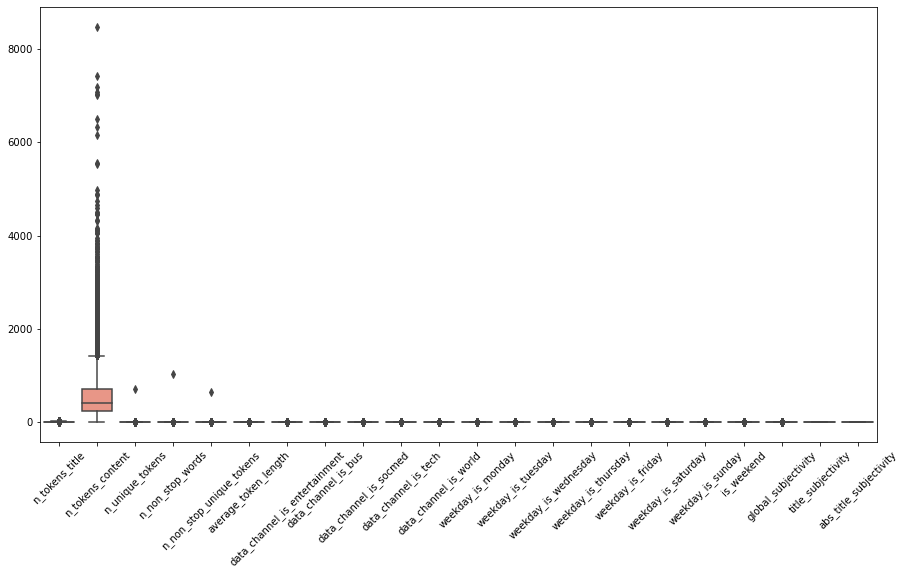

In [73]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train)

In [74]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [75]:
# pip install -U scikit-learn

In [76]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 1.1.0.


In [77]:
scale = StandardScaler()
Scaled_X_train = pd.DataFrame(scale.fit_transform(X_train), columns=list(X_train.columns))

<AxesSubplot:>

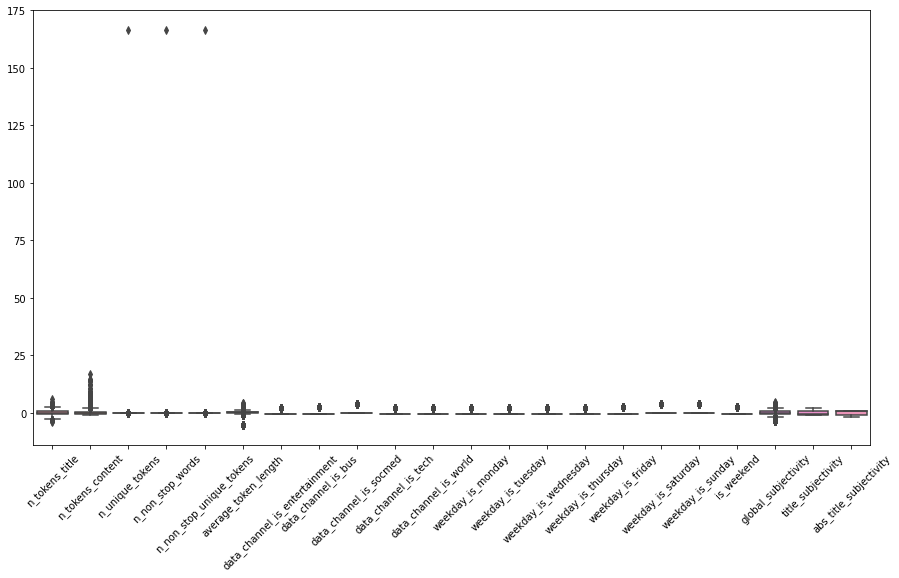

In [79]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data =Scaled_X_train)

In [80]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [81]:
Outlier_X_train = Scaled_X_train.apply(cap_outliers, axis=0)
Outlier_X_train


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,...,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,title_subjectivity,abs_title_subjectivity
0,-1.133859,-0.393608,0.000516,-0.001228,0.009148,0.500592,-0.460724,2.308644,-0.249890,-0.475029,...,-0.480036,-0.480150,-0.472691,2.436343,-0.255539,-0.275224,-0.389476,0.211942,-0.259319,-0.219045
1,-0.189147,0.920758,-0.033850,-0.001228,-0.026325,0.236358,-0.460724,-0.433155,-0.249890,-0.475029,...,-0.480036,-0.480150,-0.472691,-0.410451,-0.255539,-0.275224,-0.389476,0.228407,-0.874381,0.839486
2,-0.661503,-0.351345,0.007876,-0.001228,0.014742,0.133830,-0.460724,-0.433155,3.000054,-0.475029,...,-0.480036,-0.480150,-0.472691,-0.410451,3.000054,-0.275224,2.567555,0.059212,0.014042,-0.689503
3,-1.133859,-0.492925,0.007003,-0.001228,0.008464,-0.142635,-0.460724,-0.433155,-0.249890,-0.475029,...,-0.480036,2.082682,-0.472691,-0.410451,-0.255539,-0.275224,-0.389476,0.773632,0.904905,-1.390990
4,-0.661503,-0.752839,0.025183,-0.001228,0.011686,0.243720,-0.460724,-0.433155,-0.249890,2.105135,...,-0.480036,-0.480150,-0.472691,-0.410451,-0.255539,-0.275224,-0.389476,0.918858,-0.874381,0.839486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,0.283209,-0.552092,0.012812,-0.001228,0.010450,0.648665,2.170496,-0.433155,-0.249890,-0.475029,...,-0.480036,-0.480150,-0.472691,-0.410451,-0.255539,3.000054,2.567555,-0.309485,-0.874381,0.839486
27746,1.227922,-0.361911,0.013725,-0.001228,0.018057,0.134807,2.170496,-0.433155,-0.249890,-0.475029,...,-0.480036,-0.480150,-0.472691,2.436343,-0.255539,-0.275224,-0.389476,0.072030,-0.874381,0.839486
27747,-0.189147,0.840459,-0.022678,-0.001228,-0.028237,0.672056,-0.460724,-0.433155,-0.249890,-0.475029,...,-0.480036,-0.480150,-0.472691,-0.410451,3.000054,-0.275224,2.567555,-0.382400,-0.874381,0.839486
27748,0.755565,1.009509,-0.035549,-0.001228,-0.030720,0.467554,-0.460724,-0.433155,-0.249890,-0.475029,...,-0.480036,-0.480150,2.115545,-0.410451,-0.255539,-0.275224,-0.389476,-0.090367,2.200928,0.839486


In [82]:
Scaled_X_train.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,...,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,title_subjectivity,abs_title_subjectivity
count,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,2.775000e+04,2.775000e+04,27750.000000,2.775000e+04,...,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,27750.000000,27750.000000,2.775000e+04,27750.000000,2.775000e+04,2.775000e+04
mean,-0.000778,-0.023812,-0.005892,-0.005893,-0.005890,0.070928,-4.161596e-16,1.439285e-15,-0.058875,-1.044202e-15,...,-6.114788e-16,3.697983e-16,2.410084e-17,-2.005803e-16,-0.055980,-0.044597,3.001403e-17,0.023247,-5.293863e-17,5.088142e-16
std,0.996507,0.875078,0.037222,0.032655,0.043360,0.631542,1.000018e+00,1.000018e+00,0.764409,1.000018e+00,...,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,0.780949,0.837976,1.000018e+00,0.912691,1.000018e+00,1.000018e+00
min,-3.000054,-1.158560,-0.131981,-0.161189,-0.178369,-3.000054,-4.607242e-01,-4.331548e-01,-0.249890,-4.750290e-01,...,-4.800364e-01,-4.801501e-01,-4.726913e-01,-4.104513e-01,-0.255539,-0.275224,-3.894756e-01,-3.000054,-8.743810e-01,-1.806842e+00
25%,-0.661503,-0.636617,-0.020228,-0.001228,-0.017952,-0.082838,-4.607242e-01,-4.331548e-01,-0.249890,-4.750290e-01,...,-4.800364e-01,-4.801501e-01,-4.726913e-01,-4.104513e-01,-0.255539,-0.275224,-3.894756e-01,-0.405808,-8.743810e-01,-9.247323e-01
50%,-0.189147,-0.290064,-0.003991,-0.001228,-0.001574,0.138423,-4.607242e-01,-4.331548e-01,-0.249890,-4.750290e-01,...,-4.800364e-01,-4.801501e-01,-4.726913e-01,-4.104513e-01,-0.255539,-0.275224,-3.894756e-01,0.086483,-4.130847e-01,8.394865e-01
75%,0.755565,0.362364,0.012551,-0.001228,0.015020,0.362118,-4.607242e-01,-4.331548e-01,-0.249890,-4.750290e-01,...,-4.800364e-01,-4.801501e-01,-4.726913e-01,-4.104513e-01,-0.255539,-0.275224,-3.894756e-01,0.557940,6.632733e-01,8.394865e-01
max,3.000054,3.000054,3.000054,3.000054,3.000054,3.000054,2.170496e+00,2.308644e+00,3.000054,2.105135e+00,...,2.083175e+00,2.082682e+00,2.115545e+00,2.436343e+00,3.000054,3.000054,2.567555e+00,3.000054,2.200928e+00,8.394865e-01


In [83]:
Outlier_X_train.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,...,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,title_subjectivity,abs_title_subjectivity
count,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,27750.000000,2.775000e+04,2.775000e+04,27750.000000,2.775000e+04,...,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,27750.000000,27750.000000,2.775000e+04,27750.000000,2.775000e+04,2.775000e+04
mean,-0.000778,-0.023812,-0.005892,-0.005893,-0.005890,0.070928,-4.161596e-16,1.439285e-15,-0.058875,-1.044202e-15,...,-6.114788e-16,3.697983e-16,2.410084e-17,-2.005803e-16,-0.055980,-0.044597,3.001403e-17,0.023247,-5.293863e-17,5.088142e-16
std,0.996507,0.875078,0.037222,0.032655,0.043360,0.631542,1.000018e+00,1.000018e+00,0.764409,1.000018e+00,...,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,0.780949,0.837976,1.000018e+00,0.912691,1.000018e+00,1.000018e+00
min,-3.000054,-1.158560,-0.131981,-0.161189,-0.178369,-3.000054,-4.607242e-01,-4.331548e-01,-0.249890,-4.750290e-01,...,-4.800364e-01,-4.801501e-01,-4.726913e-01,-4.104513e-01,-0.255539,-0.275224,-3.894756e-01,-3.000054,-8.743810e-01,-1.806842e+00
25%,-0.661503,-0.636617,-0.020228,-0.001228,-0.017952,-0.082838,-4.607242e-01,-4.331548e-01,-0.249890,-4.750290e-01,...,-4.800364e-01,-4.801501e-01,-4.726913e-01,-4.104513e-01,-0.255539,-0.275224,-3.894756e-01,-0.405808,-8.743810e-01,-9.247323e-01
50%,-0.189147,-0.290064,-0.003991,-0.001228,-0.001574,0.138423,-4.607242e-01,-4.331548e-01,-0.249890,-4.750290e-01,...,-4.800364e-01,-4.801501e-01,-4.726913e-01,-4.104513e-01,-0.255539,-0.275224,-3.894756e-01,0.086483,-4.130847e-01,8.394865e-01
75%,0.755565,0.362364,0.012551,-0.001228,0.015020,0.362118,-4.607242e-01,-4.331548e-01,-0.249890,-4.750290e-01,...,-4.800364e-01,-4.801501e-01,-4.726913e-01,-4.104513e-01,-0.255539,-0.275224,-3.894756e-01,0.557940,6.632733e-01,8.394865e-01
max,3.000054,3.000054,3.000054,3.000054,3.000054,3.000054,2.170496e+00,2.308644e+00,3.000054,2.105135e+00,...,2.083175e+00,2.082682e+00,2.115545e+00,2.436343e+00,3.000054,3.000054,2.567555e+00,3.000054,2.200928e+00,8.394865e-01


<AxesSubplot:>

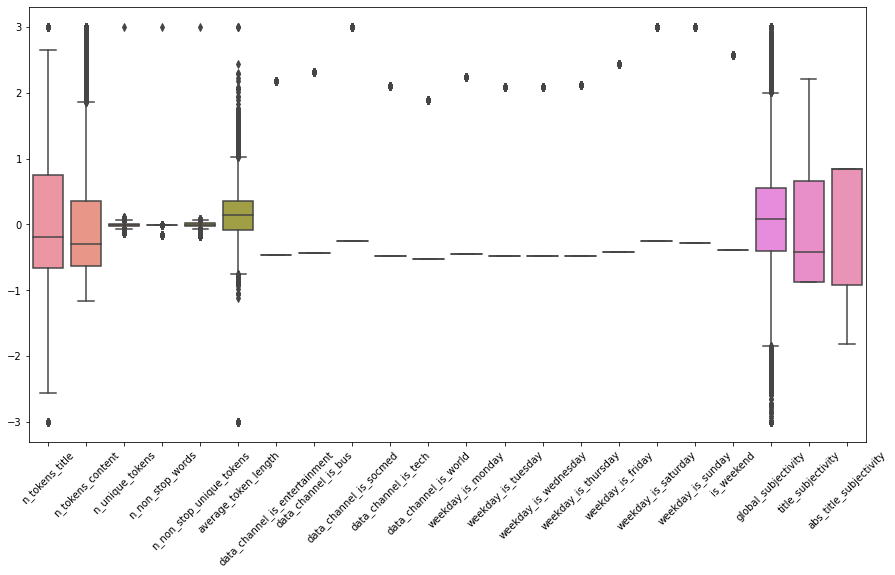

In [84]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = Outlier_X_train)


# Random Forest Regression

In [85]:
# !pip install scikit-learn==1.1.0 --user

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(Outlier_X_train, y_train.to_numpy().reshape(-1,))

RandomForestRegressor(n_jobs=-1)

In [88]:
feature_importances = pd.DataFrame({'col':Outlier_X_train.columns, 'importance':rf.feature_importances_})

In [89]:
from sklearn.decomposition import PCA

# Important Features

<BarContainer object of 22 artists>

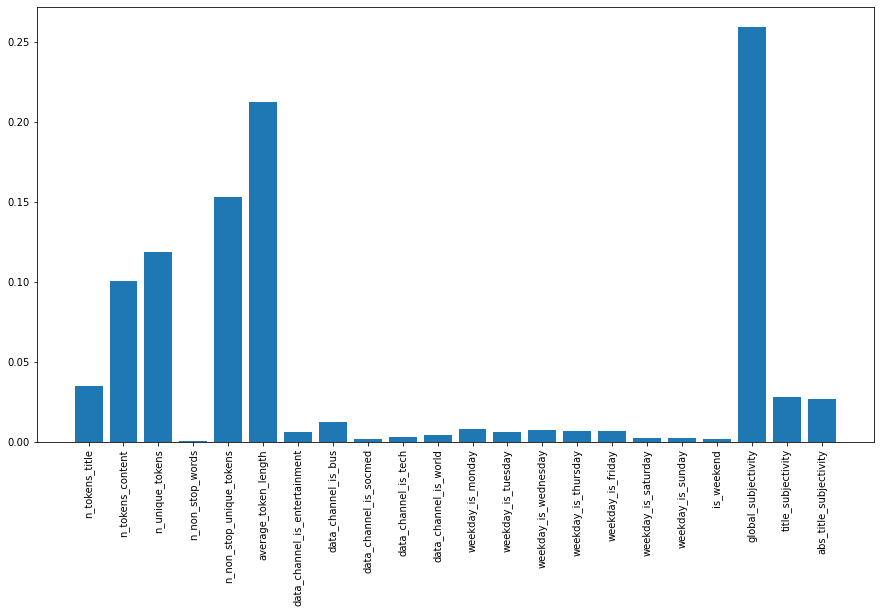

In [90]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.bar(feature_importances['col'], feature_importances['importance'])


# PCA

<AxesSubplot:>

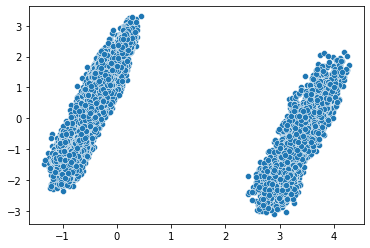

In [91]:
pca = PCA(n_components=9)
components = pca.fit_transform(Outlier_X_train)

#Plotting first 2
sns.scatterplot(x=components[:,0], y=components[:,1])

# PCA Component

<BarContainer object of 9 artists>

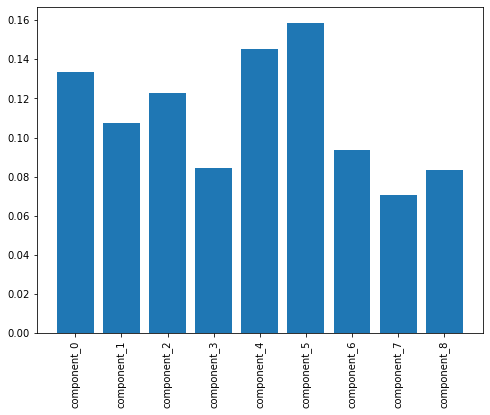

In [92]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(components, y_train.to_numpy().reshape(-1,))

feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(components.shape[1])], 'importance':rf.feature_importances_})

plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
plt.bar(feature_importances['col'], feature_importances['importance'])

In [95]:
model = RandomForestRegressor(n_estimators=100, max_depth=20, n_jobs=-1)

In [96]:
model.fit(Outlier_X_train,  y_train.to_numpy().reshape(-1,))

RandomForestRegressor(max_depth=20, n_jobs=-1)

In [97]:
y_pred = model.predict(X_test)
len(y_pred)

11894

In [98]:
y_pred

array([32690.54962446, 31120.92962446, 15501.70333333, ...,
       32951.15761029, 25672.9775    , 18467.0434375 ])

In [108]:
len(y_pred)

11894

In [99]:
mean_squared_error(y_test, y_pred)


# r2_score(y_test, y_pred)

470206489.4535132

In [100]:
# pipeline

In [101]:
#Instantiate pipeline
scale = StandardScaler()
pca = PCA(n_components=14)
poly = PolynomialFeatures(degree=2)
#model = LinearRegression(n_jobs=-1)
model = RandomForestRegressor(n_estimators=100, max_depth=20, n_jobs=-1)

pipe_lr = Pipeline(steps = [ ('scaling',scale), 
                            ('pca',pca), 
                            ('poly',poly), 
                            ('model',model)])

In [106]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [107]:
pipe_lr.fit(X_train, y_train.to_numpy().reshape(-1,))

train_pred = pipe_lr.predict(X_train)
test_pred = pipe_lr.predict(X_test)

print("Train metrics")
regression_results(y_train.to_numpy().reshape(-1,), train_pred)

# print("Test metrics")
# regression_results(y_test.to_numpy().reshape(-1,), test_pred)

Train metrics
explained_variance:  0.7372
r2:  0.7372
MAE:  2508.406
MSE:  41658116.085
RMSE:  6454.3099


- Result and Explanation

- What is Rsquare error ?
- MAE error?
- MSE and RMSE error ? 

- While we train our model with 70 % of our data and predicted on test data which is 30 % we got the result as follows 
- like Rsquare error 0.73
- MAE = 2508

In [112]:
y_pred[y_pred>50000]

array([ 60174.89      ,  64884.72076819, 146407.95962446,  57453.95962446,
        56575.75      ,  62699.124375  ,  68045.4619578 ,  66263.80962446,
        52154.08187066,  50382.5319578 , 276097.82962446, 144920.124375  ])

In [141]:
11894

11894

In [113]:
len(list(y_pred[y_pred>50000]))

12

In [140]:
y_pred.min()

2231.5106873271407

In [115]:
y_pred.max()

276097.82962446415

In [138]:
(y_pred.min() + y_pred.max())/5

55665.868062358255

In [149]:
len(y_pred[y_pred<y_pred.min()*10])

7009

In [153]:
filtered = [num for num in list(y_pred) if y_pred.min()*10 < num <= y_pred.min()*15 ]
len(filtered)

4579

In [154]:
len(y_pred[y_pred >y_pred.min()*15])

306

In [157]:
lst_a = [len(y_pred[y_pred<y_pred.min()*10]), len(filtered), len(y_pred[y_pred >y_pred.min()*15]) ]

In [158]:
lst_b = ["Least Popular", "medium Popular", "Popular"]

In [160]:
data_for_plot = pd.DataFrame(list(zip(lst_a, lst_b)), columns=["values", "news"])
data_for_plot

,values,news
0,7009,Least Popular
1,4579,medium Popular
2,306,Popular


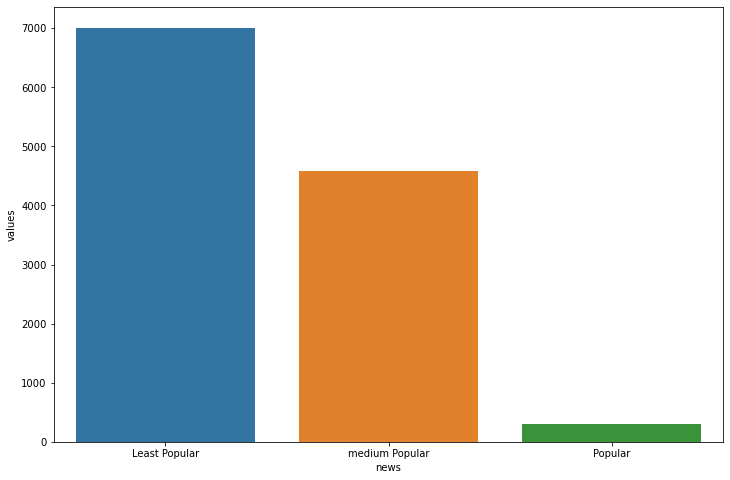

In [163]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=data_for_plot, y="values", x="news")


<center>End of Result</center>